## ASSIGNMENT 3

**Vishnupriya Santhosh**
**vs623**

* **The Text Classification Task implemented here is the Sentiment analysis (positive/negative sentiment)**
* **I have used the Sentiment Analysis on the IMDB Rating Dataset**
* **The Goal of the model is to correctly predict the positive and negative reviews based on the sentiments by using different classifiers**

#### Dataset
* The Dataset contains 50000 rows and two attributes which are the review and the sentiment
* The sentiment associated with each of the reviews indicates whether the review is a positive or a negative review

#### Loading the required libraries

In [1]:
import pandas as pd
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### The Dataset used is the IMDB Dataset from Kaggle

In [6]:
#Import the Dataset
imdb_data=pd.read_csv('IMDB_Dataset.csv')
imdb_raw=pd.read_csv('IMDB_Dataset.csv')

print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#### Splitting the dataset into Train and Test datasets

In [9]:
# Train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]

# Test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


#### Preprocessing the data
* I have followed a few preprocessing techniques on the data which includes
** Tokenization
** Removal of Stop words

#### 1.Tokenization

In [64]:
for i in imdb_data['review']:
    tokens = nltk.word_tokenize(i)

#### 2.Removal of Stopwords

In [11]:
stopword_list=nltk.corpus.stopwords.words('english')

In [13]:
# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if
                           token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if
                           token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

**An example of the Stopwords Removal Illustrated**
* I have illustrated an example on how the stopwords removal is applied on the dataset
* imdb_data gives the normalized text after the stopwords removal
* imdb_raw gives the text before the stopwords removal


In [14]:
imdb_data['review'][0]

"One reviewers mentioned watching 1 Oz episode ' hooked. right , exactly happened me.<br / ><br / >The first thing struck Oz brutality unflinching scenes violence , set right word GO. Trust , show faint hearted timid. show pulls punches regards drugs , sex violence. hardcore , classic use word.<br / ><br / >It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City , experimental section prison cells glass fronts face inwards , privacy high agenda. Em City home many .. Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish .... scuffles , death stares , dodgy dealings shady agreements never far away.<br / ><br / >I would say main appeal show due fact goes shows ' dare. Forget pretty pictures painted mainstream audiences , forget charm , forget romance ... OZ ' mess around. first episode ever saw struck nasty surreal , ' say ready , watched , developed taste Oz , got accustomed high levels graphic violence. violence , injustice ( cr

In [15]:
imdb_raw['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#### 3.Lemmatization of the Dataset

In [16]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [18]:
imdb_data['review'][0]

"one review mention watch 1 oz episod ' hooked. right , exactli happen me.<br / ><br / >the first thing struck oz brutal unflinch scene violenc , set right word go. trust , show faint heart timid. show pull punch regard drug , sex violence. hardcor , classic use word.<br / ><br / >it call oz nicknam given oswald maximum secur state penitentary. focus mainli emerald citi , experiment section prison cell glass front face inward , privaci high agenda. em citi home mani .. aryan , muslim , gangsta , latino , christian , italian , irish .... scuffl , death stare , dodgi deal shadi agreement never far away.<br / ><br / >i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audienc , forget charm , forget romanc ... oz ' mess around. first episod ever saw struck nasti surreal , ' say readi , watch , develop tast oz , got accustom high level graphic violence. violenc , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well manner , midd

#### 4. Removal of Special Characters

In [20]:
import re,string,unicodedata
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [21]:
imdb_data['review'][0]

'one review mention watch 1 oz episod  hooked right  exactli happen mebr  br  the first thing struck oz brutal unflinch scene violenc  set right word go trust  show faint heart timid show pull punch regard drug  sex violence hardcor  classic use wordbr  br  it call oz nicknam given oswald maximum secur state penitentary focus mainli emerald citi  experiment section prison cell glass front face inward  privaci high agenda em citi home mani  aryan  muslim  gangsta  latino  christian  italian  irish  scuffl  death stare  dodgi deal shadi agreement never far awaybr  br  i would say main appeal show due fact goe show  dare forget pretti pictur paint mainstream audienc  forget charm  forget romanc  oz  mess around first episod ever saw struck nasti surreal   say readi  watch  develop tast oz  got accustom high level graphic violence violenc  injustic  crook guard  sold nickel  inmat  kill order get away  well manner  middl class inmat turn prison bitch due lack street skill prison experi  wa

##### Getting the Normalized Train Reviews and the Normalized Test Reviews

In [22]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review mention watch 1 oz episod  hooked right  exactli happen mebr  br  the first thing struck oz brutal unflinch scene violenc  set right word go trust  show faint heart timid show pull punch regard drug  sex violence hardcor  classic use wordbr  br  it call oz nicknam given oswald maximum secur state penitentary focus mainli emerald citi  experiment section prison cell glass front face inward  privaci high agenda em citi home mani  aryan  muslim  gangsta  latino  christian  italian  irish  scuffl  death stare  dodgi deal shadi agreement never far awaybr  br  i would say main appeal show due fact goe show  dare forget pretti pictur paint mainstream audienc  forget charm  forget romanc  oz  mess around first episod ever saw struck nasti surreal   say readi  watch  develop tast oz  got accustom high level graphic violence violenc  injustic  crook guard  sold nickel  inmat  kill order get away  well manner  middl class inmat turn prison bitch due lack street skill prison experi  wa

In [23]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch piec cinemat garbag took least 2 page find somebodi els  think appallingli unfunni montag  acm humour 70 inde era   least funni set sketch comedy  ever seen  till come along half skit alreadi done  infinit better  act monti python woodi allen  say nice piec anim last 90 second highlight film would still get close sum mindless drivelridden wast 75 minut is semin comedi  world semin realli mean semen scatolog humour  world scat actual feces precursor joke  mean handbook comedy tit bum odd beaver nice  pubesc boy least one hand free  found playboy exists give break earli 70  way sketch comedi go back least ten year prior way could even forgiv film even made gunpoint retro  hardly sketch clown subtli pervert children may cut edg circl  could actual funni  come realli quit sad kept go throughout entir 75 minut  sheer belief may save genuin funni skit end gave film 1 lower score  recommend insomniac coma patient  perhap peopl suffer lockjaw  jaw would final drop open disbe

#### 5. Splitting the data into Bag of Words (BoW) Representation

In [24]:
# Bag of words representation
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (40000, 6178665)
BOW_cv_test: (10000, 6178665)


#### Splitting the data into TF-IDF representation

In [26]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6178665)
Tfidf_test: (10000, 6178665)


In [28]:
# Labelling the dataset
from sklearn.preprocessing import LabelBinarizer

#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [29]:
imdb_data['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [30]:
#Spliting the sentiment data

train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


#### Modelling the Dataset

#### LOGISTIC REGRESSION

In [31]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression,SGDClassifier

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# Logistic regression model for bag of words
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

# Logistic regression model for bag of words tfidf features
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [32]:
# Logistic regression model performance on test dataset

#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

#Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [33]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7492
lr_tfidf_score : 0.7486


#### Classification Reports generated for both features

In [34]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,
                                    target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,
                                      target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.74      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



#### LINEAR SUPPORT VECTOR MACHINE (SVM)

In [37]:
# Train the SVM
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [38]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [39]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5797
svm_tfidf_score : 0.5112


#### Classification Reports for both the features

In [40]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,
                                     target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,
                                       target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.17      0.29      4993
    Negative       0.54      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.49     10000
weighted avg       0.74      0.58      0.49     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



#### Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
# Train the model
mnb=MultinomialNB()

#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\16292\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [44]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)


[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [45]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7488
mnb_tfidf_score : 0.749


#### Classification Reports for both the features

In [46]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,
                                     target_names=['Positive','Negative'])
print(mnb_bow_report)

#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,
                                       target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



#### Convolutional Neural Networks 

In [50]:
cnn_imdb_data = imdb_data

In [51]:
cnn_imdb_data.head()

,review,sentiment
0,one review mention watch 1 oz episod hooked r...,positive
1,wonder littl production br br the film techn...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi cl...,negative
4,petter mattei love time money visual stun f...,positive


In [52]:
cnn_imdb_data['sentiment'] = cnn_imdb_data['sentiment'].map(
    {'positive': 1, 'negative': 0}).astype('float32')
print(imdb_data.head())

                                              review  sentiment
0  one review mention watch 1 oz episod  hooked r...        1.0
1  wonder littl production br  br  the film techn...        1.0
2  thought wonder way spend time hot summer weeke...        1.0
3  basic  famili littl boy  jake  think  zombi cl...        0.0
4  petter mattei   love time money  visual stun f...        1.0


In [53]:

# Split the data into training, test, and validation sets (e.g., 70% train, 15% validation, 15% test)
train_data, temp_data, train_labels, temp_labels = 
train_test_split(imdb_data['review'], imdb_data['sentiment'], test_size=0.3, random_state=42)

# Split the non-training data into validation and test sets
valid_data, test_data, valid_labels, test_labels = 
train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

print("Training set size:", len(train_data))
print("Validation set size:", len(valid_data))
print("Test set size:", len(test_data))

Training set size: 35000
Validation set size: 7500
Test set size: 7500


In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

max_words = 10000 
max_length = 100

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

# Convert text data to sequences

train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=
                             max_length, padding='post', truncating='post')

valid_sequences = tokenizer.texts_to_sequences(valid_data)
valid_padded = pad_sequences(valid_sequences, maxlen=
                             max_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=
                            max_length, padding='post', truncating='post')


In [55]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Define the CNN model
embedding_dim = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using training and validation sets
model.fit(train_padded, train_labels, epochs=5, 
          validation_data=(valid_padded, valid_labels), batch_size=32)


Epoch 1/5
1094/1094 [==============================] - 21s 17ms/step - loss: 0.4060 - accuracy: 0.8027 - val_loss: 0.3271 - val_accuracy: 0.8563
Epoch 2/5
1094/1094 [==============================] - 18s 17ms/step - loss: 0.2456 - accuracy: 0.9000 - val_loss: 0.3371 - val_accuracy: 0.8556
Epoch 3/5
1094/1094 [==============================] - 19s 17ms/step - loss: 0.1485 - accuracy: 0.9442 - val_loss: 0.4246 - val_accuracy: 0.8367
Epoch 4/5
1094/1094 [==============================] - 19s 17ms/step - loss: 0.0546 - accuracy: 0.9824 - val_loss: 0.6283 - val_accuracy: 0.8333
Epoch 5/5
1094/1094 [==============================] - 19s 17ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.8336 - val_accuracy: 0.8421


In [56]:
loss, accuracy = model.evaluate(test_padded, test_labels)
print('Test Accuracy:', accuracy)

235/235 [==============================] - 2s 8ms/step - loss: 0.7877 - accuracy: 0.8511
Test Accuracy: 0.8510666489601135


#### Classification Report of CNN

In [62]:
y_pred = model.predict(test_padded)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

report = classification_report(test_labels, y_pred_binary, 
                               target_names=['Negative', 'Positive'])
print(report)

235/235 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      3722
    Positive       0.86      0.84      0.85      3778

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



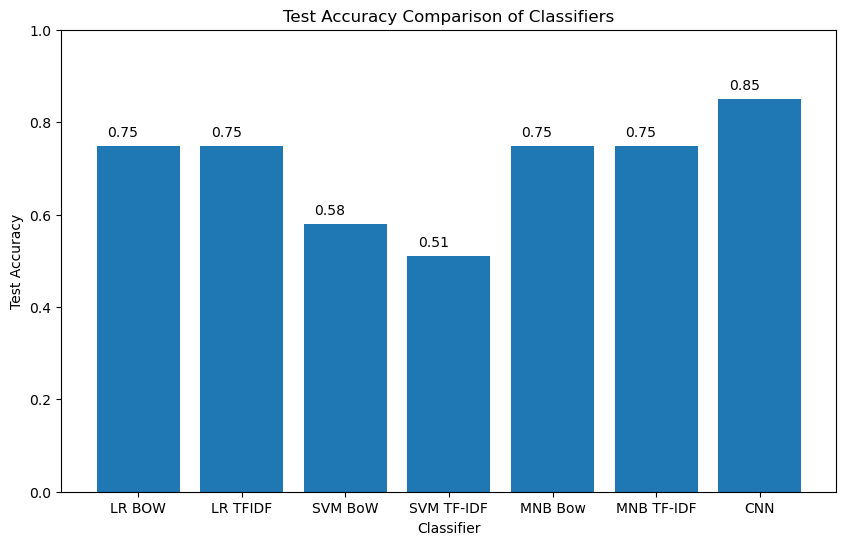

In [59]:
classifiers = [lr_bow, lr_tfidf, svm_bow, svm_tfidf, mnb_bow, mnb_tfidf, model]
classifier_names = ['LR BOW','LR TFIDF', 'SVM BoW', 'SVM TF-IDF', 'MNB Bow', 'MNB TF-IDF', 'CNN']
accuracies = [lr_bow_score,lr_tfidf_score, svm_bow_score,
              svm_tfidf_score,mnb_bow_score,mnb_tfidf_score,accuracy]

# Create a bar chart to compare test accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Classifiers')
plt.ylim(0,1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
             bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center')

plt.show()

#### Conclusion
* From the above Bar chart plot of the accuracies that we have 
* obtained by using the different Models, CNN has the highest accuracy of 85%.
* Bag of Words representation has a relative upper 
* head on the tf-idf feature, However both are more or less similar efficient features.